In [17]:
using Plots


u(x) = x^4/24 - x^3/12 + x/24

In [18]:
N = 10; 
h = 1/N;
xstart = 0. 
xend = 1.
x = Vector(xstart:h:xend)
display(x)

11-element Vector{Float64}:
 0.0
 0.1
 0.2
 0.3
 0.4
 0.5
 0.6
 0.7
 0.8
 0.9
 1.0

In [29]:
# define the so-called source function 
function U(x)
    return x^2/2-x/2
end 

U (generic function with 1 method)

In [30]:
f = U.(x)

101-element Vector{Float64}:
  0.0
 -0.00495
 -0.0098
 -0.014549999999999999
 -0.019200000000000002
 -0.02375
 -0.0282
 -0.03255
 -0.0368
 -0.04095
 -0.045
 -0.04895
 -0.0528
  ⋮
 -0.048949999999999994
 -0.044999999999999984
 -0.040949999999999986
 -0.0368
 -0.03254999999999997
 -0.028200000000000003
 -0.023749999999999993
 -0.019199999999999995
 -0.014550000000000007
 -0.009800000000000031
 -0.00495000000000001
  0.0

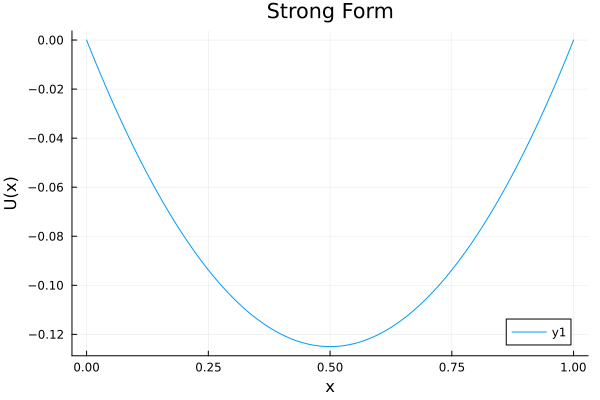

In [31]:
plot(x,f)
title!("Strong Form")
xlabel!("x")
ylabel!("U(x)")

Weak form

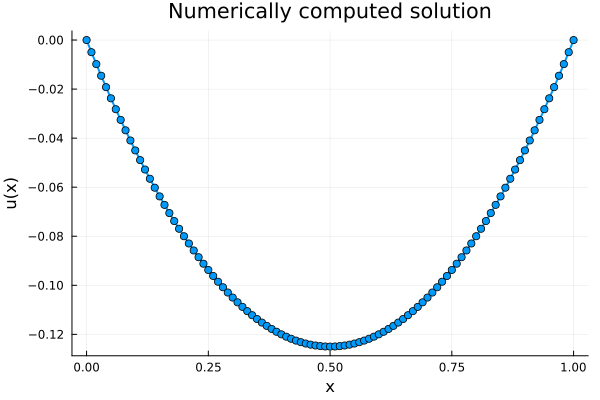

In [36]:
#..construct the mesh: see before 
nelements = 100; nnodes = nelements+1; h = 1/nelements
x = Vector(0:h:1)

#..Mesh with points and edges 
#..point holds the coordinates of the left and right node of the element
#..edges holds the global indices of the left and right node of the element
points = collect( [x[i], x[i+1]] for i in 1:nelements) 
edges = collect( [i, i+1] for i in 1:nelements) 

#..Set the source function 
#fsource(x) = x*(x-1)
fsource(x) = 1

#..Initialize local and global matrix and right-hand side value 
floc = zeros(Float64,2, 1)
Aloc = zeros(Float64,2,2)
A = zeros(Float64,nnodes, nnodes)
f = zeros(Float64,nnodes)  

#..Perform loop over elements and assemble global matrix and vector 
for i=1:nelements 

  xl, xr = points[i,:][1]
  floc = -(xr-xl)/2 * [fsource(xl), fsource(xr)]
  Aloc = (1/(xr-xl))*[1 -1; -1 1]

  for j=1:2 
    f[edges[i][j]] += floc[j]
    for k =1:2 
      A[edges[i][j], edges[i][k]] += Aloc[j,k]
    end 
  end 

end

#..handle the boundary conditions in the matrix and right-hand side vector 
A[1,1] = 1;     A[1,2] = 0;        f[1]   = 0 
A[end,end-1]=0; A[end,end] = 1;    f[end] = 0

#..solve the linear system
u = A \ f

#..plot the solution  
p1=plot(x,u,shape=:circle,lw=2,legend=false)
xlabel!("x") 
ylabel!("u(x)")
title!("Numerically computed solution")

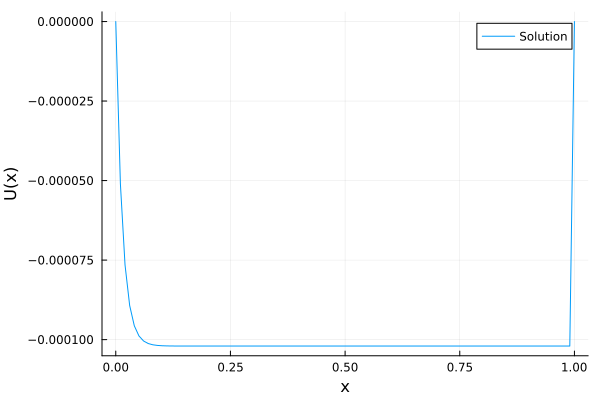

In [11]:
using Plots

function solve_poisson_1d()
    # Define parameters and discretization
    L = 1.0  # Length of the domain
    num_points = 100  # Number of points in the discretization
    dx = L / (num_points - 1)  # Grid spacing
    
    # Initialize arrays for the solution and the right-hand side
    u = zeros(num_points)  # Solution array
    f = ones(num_points)   # Right-hand side (constant for this example)
    
    # Boundary conditions
    u[1] = 0.0
    u[end] = 0.0
    
    # Solve the Poisson equation using finite differences
    for i in 2:num_points-1
        u[i] = (u[i-1] + u[i+1] - dx^2 * f[i]) / 2
    end
    
    return u
end

# Solve the 1D Poisson equation
solution = solve_poisson_1d()

# Create the x-axis values for plotting
L = 1.0
num_points = 100
x_values = range(0, stop=L, length=num_points)

# Plot the solution
plot(x_values, solution, xlabel="x", ylabel="U(x)", label="Solution")